band gap:  0.18209986


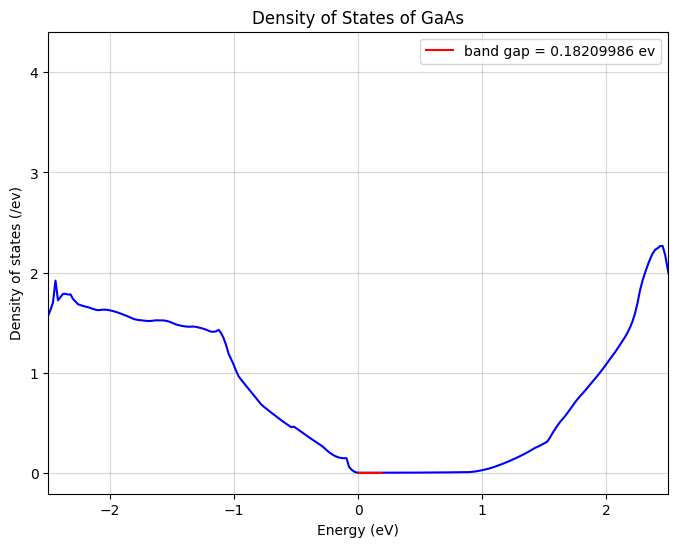

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def read_two_columns(filename):
    column1 = []
    column2 = []
    with open(filename, 'r') as file:
        for line in file:
            
            data = line.strip().split()
            if len(data) >= 2:
                column1.append(float(data[0]))
                column2.append(float(data[1]))
    return column1, column2

filename = "dos_GaAs.txt"  
energy, dos = read_two_columns(filename)


# function to find the index of element closest to the target value
def find_index(array, target_value):

    diff_array = []
    
    for i in range(len(array)):
        difference = abs(array[i] - target_value)

        diff_array.append(difference)
        
    closest_index = np.argmin(diff_array)

    return closest_index


index1 = find_index(energy, -4)
index2 = find_index(energy, 4)


# function to find the indices whose values are close to zero
def find_zero_indices(arr):
    zero_indices = [index for index, value in enumerate(arr) if value == 0]
    return zero_indices

# Energy and DOS array for energy = -4 to 4
energy_bound = energy[index1: index2]
dos_bound = dos[index1: index2]

#print(dos_bound)


zero_indices = find_zero_indices(dos_bound)

#print(zero_indices)

# indices to highlight band gap
index3 = min(zero_indices)
index4 = max(zero_indices)

# print(dos_bound[index3: index4])
# print(energy_bound[index3: index4])

band_gap = energy_bound[index3: index4][-1] - energy_bound[index3: index4][0]

print("band gap: ", band_gap)

# # Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(energy, dos, color = 'b')
#plt.plot(energy[index1: index2], dos[index1: index2])
plt.plot(energy_bound[index3: index4], dos_bound[index3: index4], color = 'red', label = f'band gap = {band_gap} ev')
plt.xlabel("Energy (eV)")
plt.ylabel("Density of states (/ev)")
plt.legend()
plt.title("Density of States of GaAs")
plt.xlim(-2.5,2.5)
plt.grid(True, alpha = 0.5)
plt.show()
